In [ ]:
from ultralytics import YOLO
import json

# Load model
model = YOLO("runs/detect/train/weights/best.pt")

# Run prediction
results = model("images/test/Moist-Chicken-Burgers.jpg")

# Load mapping from dish to ingredients
with open("dish2ingredients.json") as f:
    dish_map = json.load(f)

# Parse results
for r in results:
    for box in r.boxes:
        class_id = int(box.cls[0])
        class_name = model.names[class_id]
        print(f"Detected: {class_name}")
        
        ingredients = dish_map.get(class_name, [])
        print("→ Possible ingredients:", ingredients)



image 1/1 /home/classes/ee7722/ee772210/Desktop/project/CookVision/images/test/Moist-Chicken-Burgers.jpg: 320x640 1 hamburger, 4.2ms
Speed: 1.1ms preprocess, 4.2ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)
Detected: hamburger
→ Possible ingredients: ['hamburger buns', 'salt', 'hamburger', 'olive oil', 'tomatoes', 'pepper', 'mayonaise', 'ground black pepper', 'onions', 'green onions']


### More visual representation

image 1/1 /home/classes/ee7722/ee772210/Desktop/project/CookVision/images/test/Smashburger-recipe-120219.webp: 640x640 1 hamburger, 4.3ms
Speed: 2.5ms preprocess, 4.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

🧠 Detected dishes in image:
🍽️ hamburger (0.75)
🔗 Inferred ingredients: hamburger buns, salt, hamburger, olive oil, tomatoes, pepper, mayonaise, ground black pepper, onions, green onions


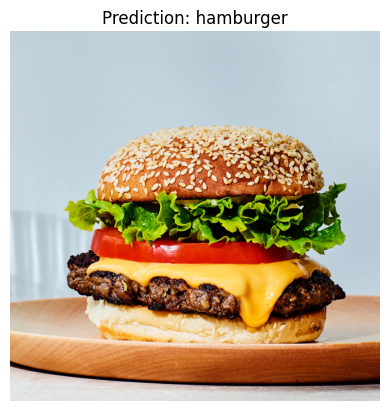

In [ ]:
from ultralytics import YOLO
import json
from PIL import Image
import matplotlib.pyplot as plt

# === Step 1: Load trained model ===
model = YOLO("runs/detect/train/weights/best.pt")

# === Step 2: Load dish-to-ingredients mapping ===
with open("dish2ingredients.json", "r") as f:
    dish_map = json.load(f)

# === Step 3: Inference on a new image ===
source_image = "images/test/Smashburger-recipe-120219.webp"
results = model(source_image)

# === Step 4: Parse and print results ===
for r in results:
    print("\n🧠 Detected dishes in image:")
    for box in r.boxes:
        class_id = int(box.cls[0])
        class_name = model.names[class_id]
        conf = float(box.conf[0])

        print(f"🍽️ {class_name} ({conf:.2f})")
        ingredients = dish_map.get(class_name, ["Ingredients not found"])
        print("🔗 Inferred ingredients:", ", ".join(ingredients))

# === Step 5: Optional: Visualize ===
img = Image.open(source_image)
plt.imshow(img)
plt.title("Prediction: " + ", ".join([model.names[int(box.cls[0])] for box in results[0].boxes]))
plt.axis("off")
plt.show()
